In [1]:
import sys
sys.path.append("../../")
from dna import *
feat_labels = ["loxP","lox2272","FRT","TagBFP","EGFP","iRFP720","mRuby2","bGHpA"]
colors      = [('#ffffcc', '#d9d927'), ('#e5d8bd', '#a65628'), ('#fddaec', '#f781bf'),
               ('#92c6ff', '#4c72b0'), ('#97f0aa', '#55a868'), ('#ff9f9a', '#c44e52'), 
               ('#d0bbff', '#8172b2'), ('#f2f2f2', '#999999')]

In [2]:
decorder = cropdna(DNA(record="input/addgene_87551.gbk"),2794, 7407)
for color_pair, label in zip(colors, feat_labels):
    editdna(decorder, key_attribute="qualifier:label", query=label, target_attribute="qualifier:facecolor_dna.py", operation=createattribute(color_pair[0]), new_copy=False)
    editdna(decorder, key_attribute="qualifier:label", query=label, target_attribute="qualifier:edgecolor_dna.py", operation=createattribute(color_pair[1]), new_copy=False)

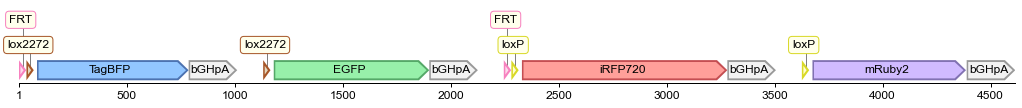

In [3]:
features = sum([decorder.finddna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(decorder, feature_list=features, standard_scale=4000, label_location='top')
fig.savefig("output/decorder.pdf", bbox_inches="tight")

In [4]:
loxp    = "ATAACTTCGTATA^ATGTATGC_TATACGAAGTTAT"
lox2272 = "ATAACTTCGTATA^AAGTATCC_TATACGAAGTTAT"
FRT     = "GAAGTTCCTATTC^TCTAGAAA_GTATAGGAACTTC"

In [5]:
#Simulation of Cre input
description    = "Cre input: Site specific recombination at loxp sites"
loxp_positions = decorder.finddna(loxp, key_attribute="sequence")
fragments      = cutdna(decorder, *loxp_positions, process_description=description)
decorder_loxp  = joindna(fragments[0], fragments[2], process_description=description)

In [6]:
description    = "Cre input: Site specific recombination at lox2272 sites"
loxp_positions = decorder_loxp.finddna(lox2272, key_attribute="sequence")
fragments      = cutdna(decorder_loxp, *loxp_positions, process_description=description)
decorder_loxp_lox2272 = joindna(fragments[0], fragments[2], process_description=description)

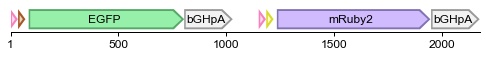

In [7]:
features = sum([decorder_loxp_lox2272.finddna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(decorder_loxp_lox2272, feature_list=features, standard_scale=4000, label_location='top', label_box=False)
fig.savefig("output/decorder_loxp_lox2272.pdf", bbox_inches="tight")

In [8]:
#Simulation of Flp input
description    = "Flp input: Site specific recombination at FRT sites"
FRT_positions  = decorder.finddna(FRT, key_attribute="sequence")
fragments      = cutdna(decorder, *FRT_positions, process_description=description)
decorder_FRT   = joindna(fragments[0], fragments[2], process_description=description)

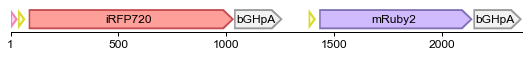

In [9]:
features = sum([decorder_FRT.finddna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(decorder_FRT, feature_list=features, standard_scale=4000, label_location='top', label_box=False)
fig.savefig("output/decorder_FRT.pdf", bbox_inches="tight")

In [10]:
# Simulation of Cre and Flp input
description   = "Flp input: Site specific recombination at FRT sites"
FRT_positions = decorder_loxp_lox2272.finddna(FRT, key_attribute="sequence")
fragments     = cutdna(decorder_loxp_lox2272, *FRT_positions, process_description=description)
decorder_loxp_lox2272_FRT = joindna(fragments[0], fragments[2], process_description=description)

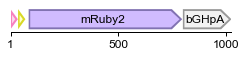

In [11]:
features = sum([decorder_loxp_lox2272_FRT.finddna(query=label, key_attribute="qualifier:label") for label in feat_labels],[])
fig = visualize(decorder_loxp_lox2272_FRT, feature_list=features, standard_scale=4000, label_location='top', label_box=False)
fig.savefig("output/decorder_loxp_lox2272_FRTA.pdf", bbox_inches="tight")